In [18]:
import openml
from utils import data
import pandas as pd
from sklearn import datasets, model_selection
from sklearn.impute import KNNImputer
import numpy as np

In [3]:
task_id = 233092

In [7]:
task = openml.tasks.get_task(task_id)
id = task.dataset_id #suppose we input the task id 
df = data.read_dataset_by_id(id)

INFO:openml.datasets.dataset:pickle write arrhythmia


In [28]:
df.keys()

dict_keys(['features', 'outputs', 'target', 'labels', 'columns', 'categorical', 'categories', 'n_categorical', 'numerical', 'n_numerical'])

In [34]:
len(df["outputs"].codes)

452

In [13]:
X = df["features"]

categorical_features = df['categorical'].tolist() #list with the names of the categorical features
#n_categorical = len(categorical_features)
n_categories = df['n_categorical'] #list of number of categories for each categorical feature

numerical_features = df['numerical'].tolist() #list with the names of the numerical features
n_numerical = len(numerical_features)

X_numerical = X[numerical_features]  # Assuming numerical_features is a list of column names
X_categorical = X[categorical_features]  # Assuming categorical_features is a list of column names

#Fix missing values
#this for loop creates a one-hot encoding for each categorical feature
for col in categorical_features:
    X_categorical[col], _ = pd.factorize(X_categorical[col])
    
# Impute missing values in numerical features USING KNN IMPUTER
imputer = KNNImputer(n_neighbors=10)
numerical_imputed = imputer.fit_transform(X_numerical)
X_numerical = pd.DataFrame(numerical_imputed, columns=X_numerical.columns) # Convert NumPy array back to Pandas DataFrame

X_ordered = pd.concat([X_numerical, X_categorical], axis=1) #ordered columns, first numerical then categorical


/tmp/ipykernel_30381/4259728658.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical[col], _ = pd.factorize(X_categorical[col])


In [14]:
display(X_ordered)

,age,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,T,...,chV5_RPwaveExists,chV5_DD_RPwaveExists,chV5_RTwaveExists,chV5_DD_RTwaveExists,chV6_RRwaveExists,chV6_DD_RRwaveExists,chV6_RPwaveExists,chV6_DD_RPwaveExists,chV6_RTwaveExists,chV6_DD_RTwaveExists
0,75.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,13.0,...,0,0,0,0,0,0,0,0,0,0
1,56.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,37.0,...,0,0,0,0,0,0,0,0,0,0
2,54.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,34.0,...,0,0,0,0,0,0,0,0,0,0
3,55.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,11.0,...,0,0,0,0,0,0,0,0,0,0
4,75.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,13.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,4.0,...,0,0,0,0,0,0,0,0,0,0
448,37.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,66.0,...,0,0,0,0,0,0,0,0,0,0
449,36.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,-19.0,...,0,0,0,0,0,0,0,0,0,0
450,32.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,29.0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y = df["outputs"].codes

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state= 11)

In [44]:
print(len(X_train) + len(X_test))
print(len(y_train) + len(y_test))
print(len(X_train))

452
452
361


In [39]:
train_indices, val_indices = model_selection.train_test_split(np.arange(X_train.shape[0]), test_size=1/9) #1/9 of train is equal to 10% of total

In [45]:
print(X_train.shape[0])
print(len(train_indices)+len(val_indices))
print(len(y_train)+len(y_test))

361
361
452


In [51]:
print(len(y_train) == len(X_train))
print(len(y_test) == len(X_test))

True
True


In [62]:
print(y_train[351])
print(max(val_indices))

15
351


In [67]:
new_array_y = [y_train[i] for i in val_indices]
new_array_x = [X_train.iloc[i] for i in train_indices]

In [69]:
X_train 

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
450,32,1,155.0,55,93,106.0,386.0,218.0,63,54.0,...,0.2,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6
170,44,0,178.0,89,106,183.0,380.0,147.0,94,-2.0,...,-0.4,-0.4,8.2,-1.3,0.0,0,0.5,0.8,17.9,24.1
442,65,1,160.0,50,85,143.0,363.0,146.0,84,-40.0,...,-0.1,0.0,6.6,-6.1,0.0,0,0.5,0.5,-3.8,0.4
137,47,0,162.0,74,102,126.0,357.0,135.0,83,55.0,...,-0.2,0.0,4.5,-1.5,0.0,0,0.6,1.2,8.1,16.5
292,40,0,178.0,76,101,165.0,355.0,203.0,115,44.0,...,0.0,-1.1,10.4,-0.6,0.0,0,0.8,2.4,24.7,49.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,33,1,165.0,58,76,130.0,333.0,160.0,71,64.0,...,-0.9,0.0,10.1,-1.8,0.0,0,0.8,1.6,19.0,33.7
91,64,1,155.0,88,82,194.0,342.0,138.0,126,-4.0,...,-0.1,0.0,4.9,-0.9,0.5,0,0.3,0.4,9.6,12.8
80,37,1,156.0,52,83,147.0,330.0,133.0,96,60.0,...,-0.4,0.0,9.3,0.0,0.0,0,0.5,0.5,31.6,33.9
191,60,1,160.0,61,81,191.0,354.0,127.0,99,76.0,...,0.1,0.0,7.7,0.0,0.0,0,0.7,0.7,21.5,27.9


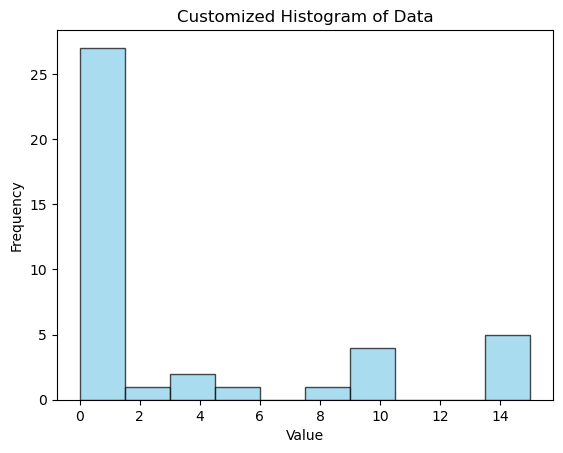

In [65]:
import matplotlib.pyplot as plt
# Create a histogram with more customizations
plt.hist(new_array, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Customized Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the histogram
plt.show()